## Practical Lab 7 - Performance Metrics for Classification Problems

In [11]:
#All imports required for this notebook
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score, classification_report, precision_recall_curve, auc


### Exploritory Data Analysis of the MNIST dataset

Dataset shape: (70000, 784)
Number of unique labels: 10


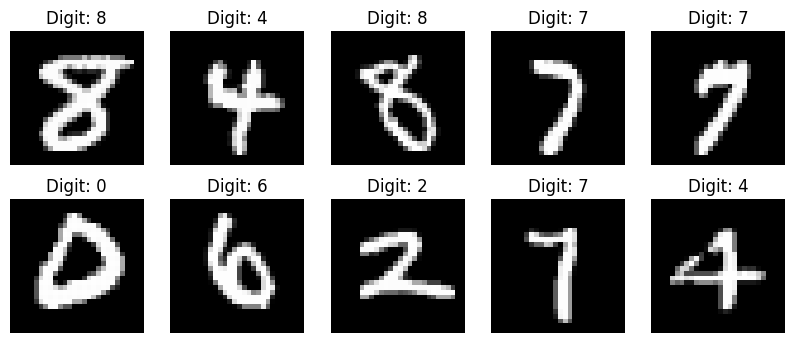

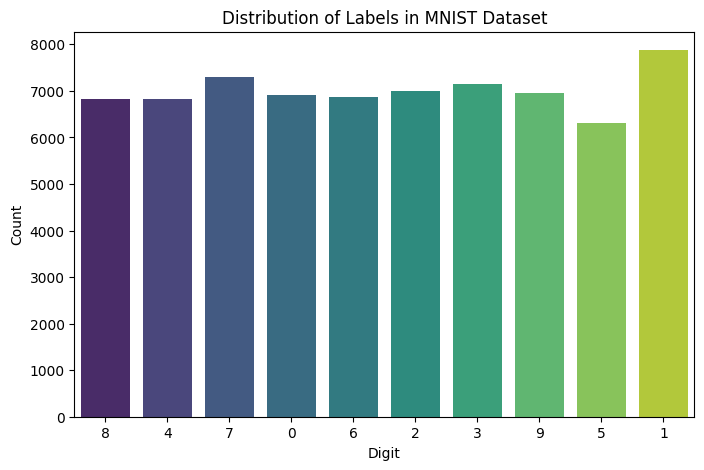

In [12]:

# Load MNIST dataset
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
mnist.data, mnist.target = shuffle(mnist.data, mnist.target, random_state=42)

# Reshape the images
images = mnist.data.reshape(-1, 28, 28)

# Basic information about the dataset
print("Dataset shape:", mnist.data.shape)
print("Number of unique labels:", len(np.unique(mnist.target)))

# Display a few random images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap="gray")
    ax.set_title("Digit: {}".format(mnist.target[i]))
    ax.axis("off")
plt.show()

# Distribution of labels in the dataset
plt.figure(figsize=(8, 5))
sns.countplot(x=mnist.target, palette="viridis")
plt.title("Distribution of Labels in MNIST Dataset")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()


### Using 8 classes(0-7)

In [13]:

# Convert target to integers (it may be stored as strings)
mnist.target = mnist.target.astype(int)

# Define selected classes
selected_classes = [0, 1, 2, 3, 4, 5, 6, 7]

# Filtering the dataset based on selected classes
mnist.data = mnist.data[np.isin(mnist.target, selected_classes)]
mnist.target = mnist.target[np.isin(mnist.target, selected_classes)]


# Ensuring the target and data are still aligned
mnist.data, mnist.target = shuffle(mnist.data, mnist.target, random_state=42)


### Spliting the data into training, validation and testing in a ratio of 80-10-10

In [14]:

# Define the ratio for train, validation, and test sets
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(
    mnist.data, mnist.target, test_size=(1 - train_ratio), random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=test_ratio / (validation_ratio + test_ratio), random_state=42
)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Training set shape: (44973, 784)
Validation set shape: (5622, 784)
Test set shape: (5622, 784)


### Training the logistic regression model using using the fit method on the training dataset

[Kaggle Reference Link](https://www.kaggle.com/code/chriscc/logistic-regression-for-mnist) 


In [30]:
# Create a Logistic Regression model
logistic_regression_model = LogisticRegression(solver='sag', max_iter=80000)

# Flattening the 28x28 images to a 1D array
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_val_flatten = X_val.reshape(X_val.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# Training the model
logistic_regression_model.fit(X_train_flatten, y_train)

# Make predictions on the validation set
y_val_pred = logistic_regression_model.predict(X_val_flatten)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy_val)

# Make predictions on the test set
y_test_pred = logistic_regression_model.predict(X_test_flatten)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy_test)


Validation Accuracy: 0.9340092493774458
Test Accuracy: 0.9363215937388829


### Running a confusion metric evaluation On the validation dataset

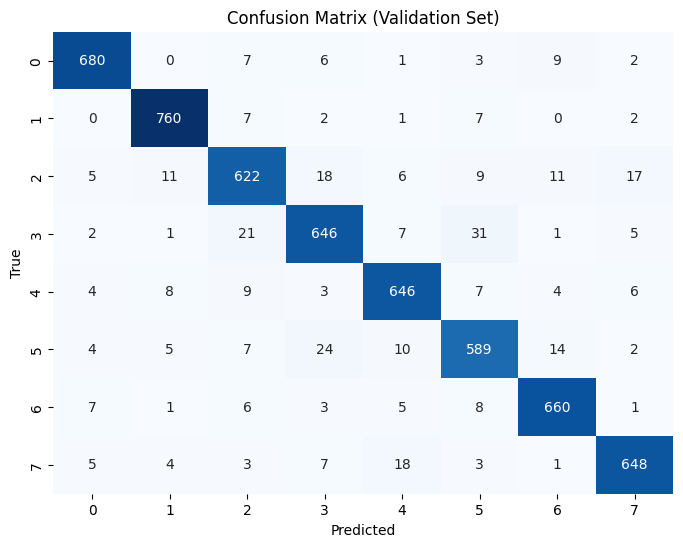

In [31]:

# Make predictions on the validation set
y_val_pred = logistic_regression_model.predict(X_val_flatten)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Running an evaluation on the Precision, Recall and F1 of each Class(0-7)

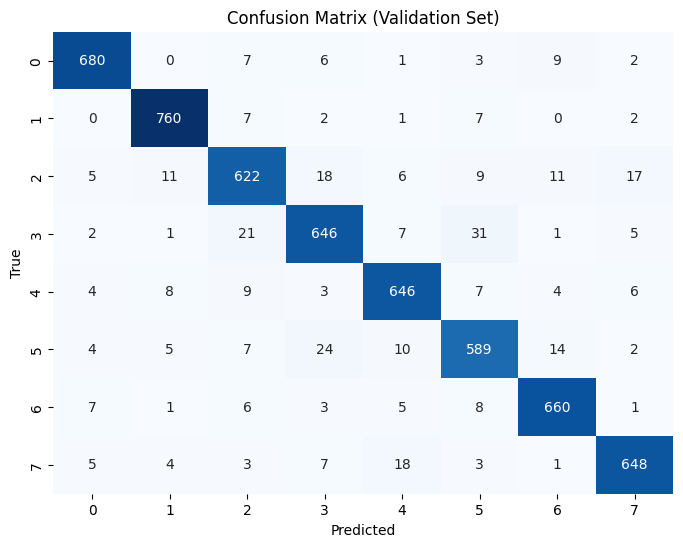

Class 0: Precision=0.9618, Recall=0.9605, F1 Score=0.9611
Class 1: Precision=0.9620, Recall=0.9756, F1 Score=0.9688
Class 2: Precision=0.9120, Recall=0.8898, F1 Score=0.9008
Class 3: Precision=0.9111, Recall=0.9048, F1 Score=0.9079
Class 4: Precision=0.9308, Recall=0.9403, F1 Score=0.9356
Class 5: Precision=0.8965, Recall=0.8992, F1 Score=0.8979
Class 6: Precision=0.9429, Recall=0.9551, F1 Score=0.9490
Class 7: Precision=0.9488, Recall=0.9405, F1 Score=0.9446


In [32]:

# Make predictions on the validation set
y_val_pred = logistic_regression_model.predict(X_val_flatten)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Calculate precision, recall, and F1 score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_val_pred, average=None)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display precision, recall, and F1 score for each class
for i in range(len(np.unique(y_val))):
    print(f"Class {i}: Precision={precision[i]:.4f}, Recall={recall[i]:.4f}, F1 Score={f1[i]:.4f}")


### Precision-Recall curve for class 3 Vs. All other classes

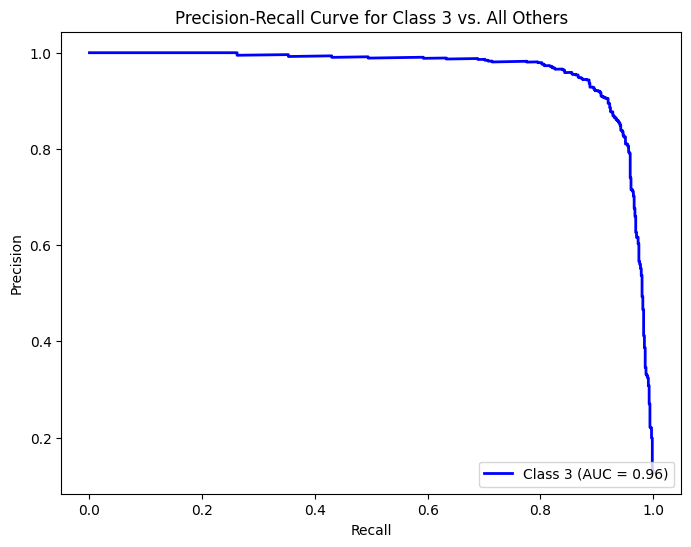

In [35]:

# Choose a class for precision-recall curve (class 3)
class_of_interest = 3

# Predict probabilities for each class
y_val_probs = logistic_regression_model.predict_proba(X_val_flatten)

# Binary indicator for the chosen class
y_val_class_binary = (y_val == class_of_interest).astype(int)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_val_class_binary, y_val_probs[:, class_of_interest])

# Calculate area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Class {class_of_interest} (AUC = {auc_score:.2f})', color='b', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Class 3 vs. All Others')
plt.legend(loc='lower right')
plt.show()



### In order to increase the precision we are increasing the threshold from 0.5 to 0.7 without retraining the model(class 3)

In [33]:

# Original predictions with default threshold (0.5)
y_val_pred_default_threshold = logistic_regression_model.predict(X_val_flatten)

# Evaluate precision and recall with the default threshold
precision_default = precision_score(y_val, y_val_pred_default_threshold, average='weighted', zero_division=1)
recall_default = recall_score(y_val, y_val_pred_default_threshold, average='weighted', zero_division=1)

# Increase the decision threshold to 0.7
new_threshold = 0.7
y_val_pred_increased_threshold = (y_val_probs.argmax(axis=1) == class_of_interest).astype(int)

# Evaluate precision and recall with the increased threshold
precision_increased_threshold = precision_score(y_val, y_val_pred_increased_threshold, average='weighted', zero_division=1)
recall_increased_threshold = recall_score(y_val, y_val_pred_increased_threshold, average='weighted', zero_division=1)

# Print results
print(f'Original Precision: {precision_default:.4f}, Recall: {recall_default:.4f}')
print(f'Precision with Increased Threshold ({new_threshold}): {precision_increased_threshold:.4f}, Recall: {recall_increased_threshold:.4f}')


Original Precision: 0.9339, Recall: 0.9340
Precision with Increased Threshold (0.7): 0.7362, Recall: 0.0050


### In order to increase the recall we are descreasing the threshold from 0.5 to 0.3 without retraining the model(Class 3)

In [34]:

# Predict probabilities for each class on the validation set
y_val_probs = logistic_regression_model.predict_proba(X_val_flatten)

# Binary indicator for the chosen class
y_val_class_binary = (y_val == class_of_interest).astype(int)

# Original predictions with default threshold (0.5)
y_val_pred_default_threshold = logistic_regression_model.predict(X_val_flatten)

# Evaluate precision and recall with the default threshold
precision_default = precision_score(y_val, y_val_pred_default_threshold, average='weighted', zero_division=1)
recall_default = recall_score(y_val, y_val_pred_default_threshold, average='weighted', zero_division=1)

# Decrease the decision threshold to 0.3
new_threshold = 0.3
y_val_pred_decreased_threshold = (y_val_probs.argmax(axis=1) == class_of_interest).astype(int)

# Evaluate precision and recall with the decreased threshold
precision_decreased_threshold = precision_score(y_val, y_val_pred_decreased_threshold, average='weighted', zero_division=1)
recall_decreased_threshold = recall_score(y_val, y_val_pred_decreased_threshold, average='weighted', zero_division=1)

# Print results
print(f'Original Precision: {precision_default:.4f}, Recall: {recall_default:.4f}')
print(f'Precision with Decreased Threshold ({new_threshold}): {precision_decreased_threshold:.4f}, Recall: {recall_decreased_threshold:.4f}')


Original Precision: 0.9339, Recall: 0.9340
Precision with Decreased Threshold (0.3): 0.7362, Recall: 0.0050


### Running the evaluation on the test dataset and providing a classification report with both the default threshold of 0.5 and a increased threshold of 0.7 and also a decreased threshold of 0.3

In [36]:

# Predict probabilities for each class on the test set
y_test_probs = logistic_regression_model.predict_proba(X_test_flatten)

# Binary indicator for the chosen class
y_test_class_binary = (y_test == class_of_interest).astype(int)

# Original predictions with default threshold (0.5)
y_test_pred_default_threshold = logistic_regression_model.predict(X_test_flatten)

# Evaluate precision and recall with the default threshold
precision_default = precision_score(y_test, y_test_pred_default_threshold, average='weighted', zero_division=1)
recall_default = recall_score(y_test, y_test_pred_default_threshold, average='weighted', zero_division=1)

# Print results for default threshold
print(f'Original Precision: {precision_default:.4f}, Recall: {recall_default:.4f}')
print("\nClassification Report (Default Threshold):")
print(classification_report(y_test, y_test_pred_default_threshold, zero_division=1))

# Increase the decision threshold to 0.7
increased_threshold = 0.7
y_test_pred_increased_threshold = (y_test_probs.argmax(axis=1) == class_of_interest).astype(int)

# Evaluate precision and recall with the decreased threshold
precision_increased_threshold = precision_score(y_test, y_test_pred_increased_threshold, average='weighted', zero_division=1)
recall_increased_threshold = recall_score(y_test, y_test_pred_increased_threshold, average='weighted', zero_division=1)

# Print results for decreased threshold
print(f'\nPrecision with Increased Threshold ({increased_threshold}): {precision_increased_threshold:.4f}, Recall: {recall_increased_threshold:.4f}')
print("\nClassification Report (Increased Threshold):")
print(classification_report(y_test, y_test_pred_increased_threshold, zero_division=1))


# Decrease the decision threshold to 0.3
decreased_threshold = 0.3
y_test_pred_decreased_threshold = (y_test_probs.argmax(axis=1) == class_of_interest).astype(int)

# Evaluate precision and recall with the decreased threshold
precision_decreased_threshold = precision_score(y_test, y_test_pred_decreased_threshold, average='weighted', zero_division=1)
recall_decreased_threshold = recall_score(y_test, y_test_pred_decreased_threshold, average='weighted', zero_division=1)

# Print results for decreased threshold
print(f'\nPrecision with Decreased Threshold ({decreased_threshold}): {precision_decreased_threshold:.4f}, Recall: {recall_decreased_threshold:.4f}')
print("\nClassification Report (Decreased Threshold):")
print(classification_report(y_test, y_test_pred_decreased_threshold, zero_division=1))



Original Precision: 0.9362, Recall: 0.9363

Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       721
           1       0.96      0.98      0.97       761
           2       0.91      0.92      0.91       671
           3       0.92      0.90      0.91       712
           4       0.95      0.95      0.95       677
           5       0.90      0.86      0.88       666
           6       0.92      0.96      0.94       665
           7       0.95      0.96      0.95       749

    accuracy                           0.94      5622
   macro avg       0.94      0.94      0.94      5622
weighted avg       0.94      0.94      0.94      5622


Precision with Increased Threshold (0.7): 0.7559, Recall: 0.1286

Classification Report (Increased Threshold):
              precision    recall  f1-score   support

           0       0.15      1.00      0.25       721
           1       0.01      0.01      0.